In [45]:
### Data Collection
import os

key=""     
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import Callback

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (18,5)


import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy import stats

In [2]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
def vis_res(history, x = int):
  epochs = [i for i in range(x)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["last_time_step_mse"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_last_time_step_mse"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  

  plt.show()

In [103]:
def vis_res_MAPE(history, x = int):
  epochs = [i for i in range(x)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["last_time_step_mape"]
  val_acc = history.history["val_last_time_step_mape"]
  val_loss = history.history["val_loss"]
  train_loss = history.history["loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento MAPE")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion MAPE")
  ax[0].set_title("Entrenamiento & validación MAPE")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("MAPE %")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

In [5]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [92]:
def last_time_step_mape(Y_true, Y_pred):
    return keras.metrics.mean_absolute_percentage_error(Y_true[:, -1], Y_pred[:, -1])

In [6]:
def hndl_trn_prdct(train_predict):
    vec_train = []
    x = 0
    while x < len(df1):
        if x < 50:
            vec_train.append(np.nan)
        if x == 50:
            for idx in range(len(train_predict)):
                vec_train.append(train_predict[idx])
            else:
                for i in range(len(df1) - len(vec_train)):
                    vec_train.append(np.nan)                  

        x += 1
    vec_train = np.array(vec_train)
    vec_train = vec_train.reshape(4457,-1)
    return vec_train ##Esta función devuelve un np.array

In [7]:
def hndl_tst_prdct(test_predict):
    vec_test = []
    x = 0
    while x < len(df1):
        if x < len(train_data):
            vec_test.append(np.nan)
        if x == len(train_data):
            for idx in range(len(test_predict)):
                vec_test.append(test_predict[idx])
            else:
                vec_test.append(np.nan)
        x += 1
    vec_test.append(np.nan)
    vec_test = np.array(vec_test)
    vec_test = vec_test.reshape(vec_test.shape[0],-1)
    return vec_test ##Esta función devuelve un np.array

In [8]:
def bld_dtfm(df_np, vc_trn, vc_tst,dataframe):
    df_f = np.concatenate((df_np,vc_trn, vc_tst), axis = 1)
    df_f = pd.DataFrame(df_f, columns=['Cierre','Train','Test'])
    
    
    # dataframe =pd.read_csv('/content/Euro_Dolar_DP/Data/Data_USD_2.csv', sep = ',')
    df=pd.read_csv('/content/Euro-Dolar/Data/EURUSD_01-05_01-22.csv', sep = ',')
    dataframe = dataframe[['Date']]
    Fch = np.array(dataframe['Date'][::-1])

    for idx in range(0,len(Fch)):
        tmp = Fch[idx]
        Fch[idx] = datetime.strptime(tmp,"%d/%m/%Y")
 
    df_f['Fecha'] = pd.DataFrame(Fch)

    #df_f = df_f.set_index('Fecha')
    # df_1
    return df_f

In [9]:
def prdctn(test_data = np.ndarray, time_step = int, nmb_pred=1):
    i = 1
    x_input = test_data[len(test_data) - (time_step):]
    tst_dta = test_data
    prdct = []
    idx = len(test_data) - (time_step)
    while i <= nmb_pred:

        x_input = tst_dta[len(tst_dta) - (time_step):]
    
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model_k.predict(x_input, verbose=0)
        yhat = yhat[:,0,:]
        tst_dta = np.append(tst_dta, yhat)
        yht_invrs = scaler.inverse_transform(yhat)
        print(f'Prediction: {yht_invrs}')
        prdct.append(yht_invrs)
        tst_dta = tst_dta.reshape(tst_dta.shape[0],1)
        #idx = len(tst_dta) - (time_step)
        i = i+1

In [10]:
df = pd.read_csv('/content/Euro-Dolar/Data/EURUSD_01-05_01-22.csv', sep = ';') ## Ruta para carga de datos desde Google Colab 
#df = pd.read_csv('/home/camilocorredor/Documents/Data_Science_Projects/Euro_Dolar/Data/EURUSD_01-05_01-22.csv', sep = ';')
#df = df[['Fecha', 'Último']]


Fch = np.array(df['Date'])
for idx in range(0,len(Fch)):
  tmp = Fch[idx]
  Fch[idx] = datetime.strptime(tmp,"%d/%m/%Y")
 
df = df.drop(columns='Date')
df['Fecha'] = pd.DataFrame(Fch)
df_F = df['Fecha']

df = df.set_index('Fecha')

df

,Cierre,Apertura,Maximo,Minimo,var%
Fecha,,,,,
2005-01-03,1.3463,1.3547,1.3582,1.3386,-0.7
2005-01-04,1.3272,1.3466,1.3496,1.3249,-1.42
2005-01-05,1.3262,1.3282,1.3305,1.3215,-0.08
2005-01-06,1.3171,1.3262,1.3286,1.3156,-0.69
2005-01-07,1.3054,1.3171,1.3251,1.3024,-0.89
...,...,...,...,...,...
2022-01-25,1.1299,1.1324,1.1330,1.1263,-0.21%
2022-01-26,1.1237,1.1301,1.1312,1.1235,-0.55%
2022-01-27,1.1143,1.1240,1.1244,1.1132,-0.84%


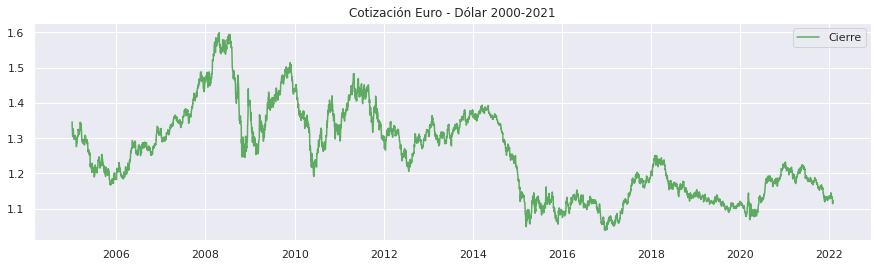

In [11]:
plt.figure(figsize=(15,4))
plt.plot(df['Cierre'], color='green', alpha = 0.6, label = 'Cierre')
plt.title('Cotización Euro - Dólar 2000-2021')
plt.legend(title = '')
plt.show()

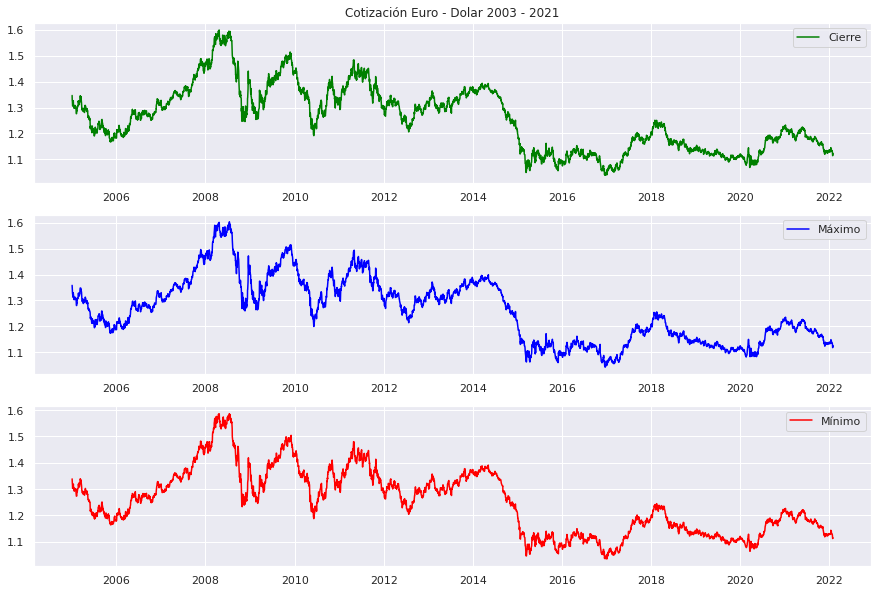

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(311)
plt.plot(df['Cierre'], color='green', label = 'Cierre')
plt.legend(title = '')
plt.title('Cotización Euro - Dolar 2003 - 2021')

plt.subplot(312)
plt.plot(df['Maximo'], color='blue', label = 'Máximo')
plt.legend(title = '')


plt.subplot(313)
plt.plot(df['Minimo'], color='red', label='Mínimo')
plt.legend(title = '')

plt.show()

In [13]:
df1 = np.array(df['Cierre'][::-1]).reshape(-1,1)
# df_np = np.array(df[::-1])
# scaler=MinMaxScaler(feature_range=(0,1))
# df1=scaler.fit_transform(np.array(df_np).reshape(-1,1))

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)

#test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size+1:len(df1),:1]
#train_data,test_data=df1[training_size:len(df1),:],df1[training_size:training_size,:1]
x_v = df1[1767:2356:]


In [35]:
len(train_data), len(test_data)

(2674, 1782)

In [17]:
vector_train = []
x = 0
for idx in range(0,len(train_data)):
    vector_train.append(train_data[idx])

for idx in range(len(df1)-len(train_data)):
    vector_train.append(np.nan)

vector_train = np.array(vector_train)[::-1].reshape(len(df1),-1)
vector_train = pd.DataFrame(vector_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [16]:
vector_test = []
for idx in range(0,len(train_data)):
    vector_test.append(np.nan)
 
for idx in range(len(test_data)):
    vector_test.append(test_data[idx])
vector_test.append(np.nan)
    
vector_test = np.array(vector_test)[::-1].reshape(len(df1),-1)
vector_test = pd.DataFrame(vector_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


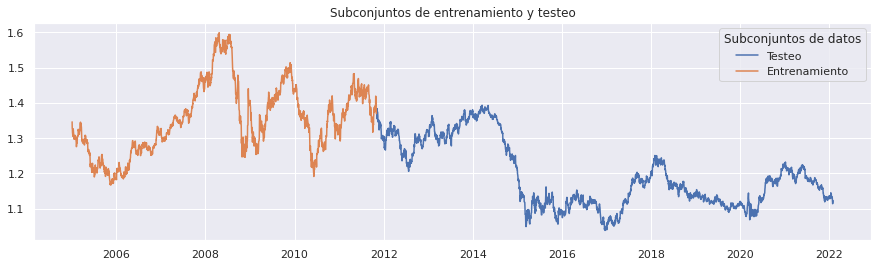

In [18]:
vector_train.rename({0:'Train'}, axis = 'columns', inplace=True)
vector_test.rename({0:'Test'}, axis = 'columns', inplace=True)

df_G = pd.concat([vector_test, vector_train],axis = 1)
df_G1 = pd.concat([df_F, df_G],axis = 1)
df_G1 = df_G1.set_index('Fecha')


plt.figure(figsize=(15,4))
plt.plot(df_G1['Train'], label = 'Testeo')
plt.plot(df_G1['Test'], label = 'Entrenamiento')
plt.title('Subconjuntos de entrenamiento y testeo')
plt.legend(title='Subconjuntos de datos')

Prueba de estacionariedad

In [20]:
DickeyFuller = adfuller(df['Cierre'])
if DickeyFuller[1] < 0.05:
    print('La serie de tiempo es estacionaria')
else:
    print('Se rechaza la hipotesis nula, la serie de tiempo no es estacionaria')
    print(f'P-Value: {round(DickeyFuller[1],3)}') ## Cambiar a estacionalidad

Se rechaza la hipotesis nula, la serie de tiempo no es estacionaria
P-Value: 0.335


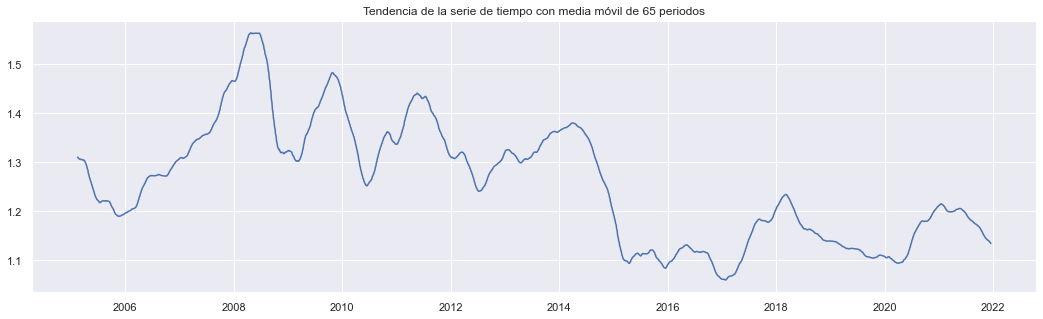

In [21]:
result = sm.tsa.seasonal_decompose(df['Cierre'],
                                                  model='additive', period = 65)  

plt.plot(result.trend)
plt.title('Tendencia de la serie de tiempo con media móvil de 65 periodos')
plt.show()

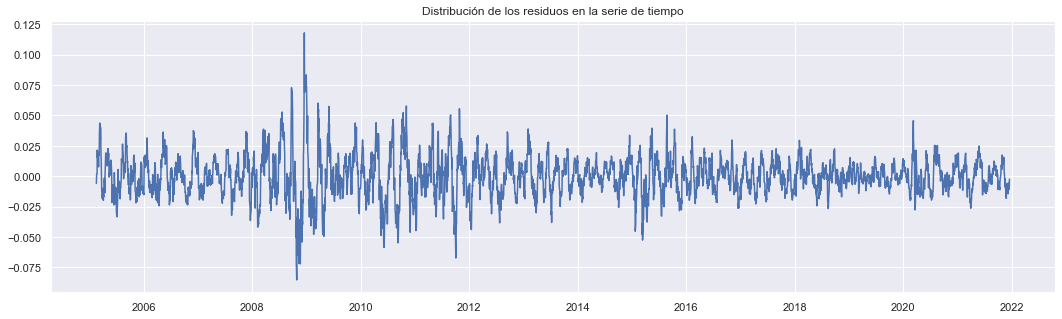

In [22]:
plt.plot(result.resid)
plt.title('Distribución de los residuos en la serie de tiempo')
plt.show()

Estacionalidad

Text(0.5, 1.0, 'Estacionalidad en la serie de tiempo')

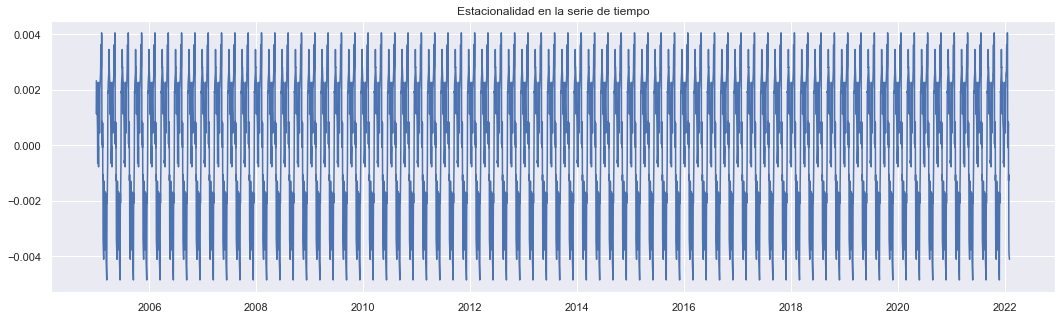

In [23]:
plt.plot(result.seasonal)
plt.title('Estacionalidad en la serie de tiempo')##Existe dos pruebas statsmodels adf 

In [24]:
residuos = list(result.resid)
newlist = [x for x in residuos if math.isnan(x) == False]
newlist = pd.DataFrame(newlist)

In [25]:
ljungbox = sm.stats.acorr_ljungbox(newlist, lags=[1], return_df = False)

if ljungbox[1] > 0.05:
  print(f'Los residuos son independientes. P-valor {ljungbox[1]}')
else:
  print(f'Los residuos no son independientes. P-valor {ljungbox[1]}')

Los residuos no son independientes. P-valor [0.]


In [26]:
shapiro_test = stats.shapiro(df['Cierre'])
if shapiro_test[1] > 0.05:
  print(f'Los residuos se distribuyen normalmente. P-valor {shapiro_test[1]}')
else: print(f'Los residuos no se distribuyen normalmente. P-valor {shapiro_test[1]}')

Los residuos no se distribuyen normalmente. P-valor 3.095346989415772e-31


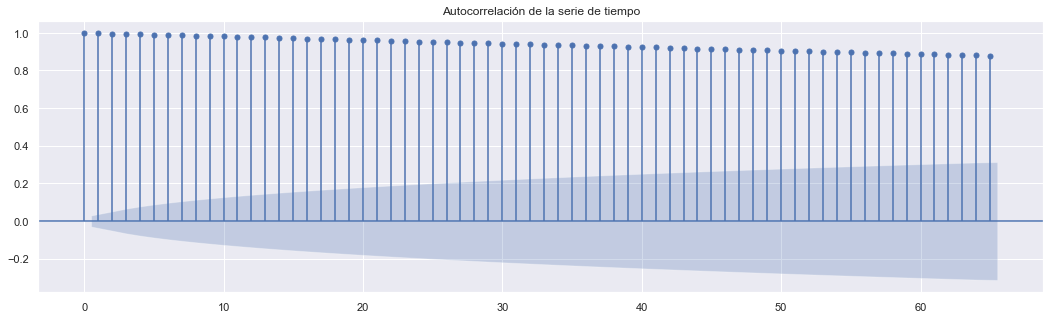

In [27]:
sm.graphics.tsa.plot_acf(df['Cierre'], lags=65)
plt.title('Autocorrelación de la serie de tiempo')
plt.show()

##Mide la correlación de una serie de tiempo frente a sus rezagos

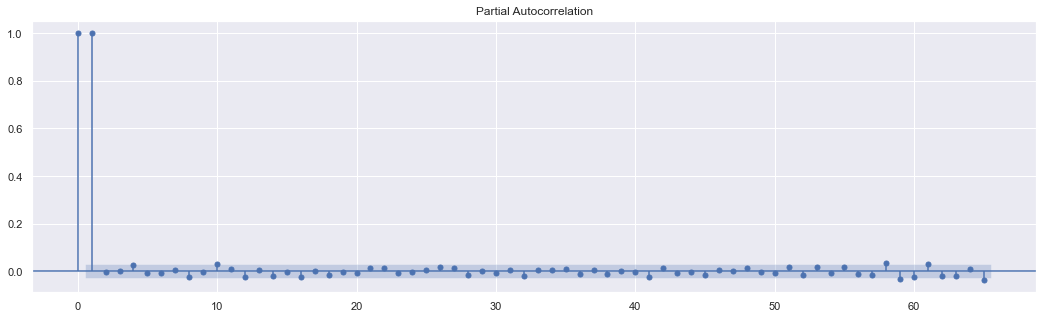

In [28]:
sm.graphics.tsa.plot_pacf(df['Cierre'], lags=65, method = 'ywm')
plt.show()
##Mide la similitud de una serie temporal y una versión anterior de si misma.


In [19]:
df2 = np.array(df['Cierre']).reshape(-1,1)
df2 = np.array(df2)
# scaler=MinMaxScaler(feature_range=(0,1))
# df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [20]:
training_size=int(len(df2)*0.6)

#test_size=len(df1)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size+1:len(df2),:1]
#train_data,test_data=df1[training_size:len(df1),:],df1[training_size:training_size,:1]
x_v = df2[1767:2356:]

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_valid, y_valid = create_dataset(x_v, time_step)

X_train, Y_train = X_train.reshape(X_train.shape[0],X_train.shape[1], -1), Y_train.reshape(Y_train.shape[0],-1)
x_test, y_test = x_test.reshape(x_test.shape[0],x_test.shape[1], -1), y_test.reshape(y_test.shape[0],-1)
x_valid, y_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1],1), y_valid.reshape(y_valid.shape[0],-1)


In [ ]:
path_model = '/home/camilocorredor/Documents/Data_Science_Projects/Euro_Dolar/Models'
checkpoint_path_2 = os.path.join(path_model,'modelo1')
checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_path_2, 
                            monitor='mean_squared_error', 
                            mode='max', 
                            save_best_only=True, 
                            save_weights_only=True, 
                            save_freq='epoch') 



In [99]:
model_01 = Sequential()
model_01.add(LSTM(100,return_sequences=True,input_shape=(time_step,1)))
model_01.add(LSTM(100, return_sequences=True))
model_01.add(LSTM(100, return_sequences=True))
model_01.add(LSTM(100))
model_01.add(Dense(1))

model_01.compile(loss='mean_squared_error', 
                optimizer='adam', 
                metrics = [last_time_step_mape]
                )
                              

##Metrica en el último dato del vector 
##Secuence to secuence personalizar el error

# [last_time_step_mse]



In [97]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get(last_time_step_mape) < 0.01:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

callback = TrainingCallback()

In [100]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [101]:
history_01 = model_01.fit(X_train, Y_train, 
                          validation_data=(x_valid, y_valid),
                          epochs = 50,batch_size = 32,
                          callbacks = [callback_early],
                          verbose=1)

Epoch 1/50
82/82 [==============================] - 7s 29ms/step - loss: 0.0727 - last_time_step_mape: 11.3645 - val_loss: 0.0020 - val_last_time_step_mape: 2.7913
Epoch 2/50
82/82 [==============================] - 1s 15ms/step - loss: 0.0043 - last_time_step_mape: 3.8282 - val_loss: 7.0046e-04 - val_last_time_step_mape: 1.6198
Epoch 3/50
82/82 [==============================] - 1s 14ms/step - loss: 0.0024 - last_time_step_mape: 2.8874 - val_loss: 4.1033e-04 - val_last_time_step_mape: 1.2730
Epoch 4/50
82/82 [==============================] - 1s 14ms/step - loss: 0.0011 - last_time_step_mape: 1.9486 - val_loss: 4.3983e-04 - val_last_time_step_mape: 1.3454
Epoch 5/50
82/82 [==============================] - 1s 15ms/step - loss: 0.0011 - last_time_step_mape: 1.9788 - val_loss: 0.0019 - val_last_time_step_mape: 3.0030
Epoch 6/50
82/82 [==============================] - 1s 14ms/step - loss: 9.1718e-04 - last_time_step_mape: 1.7605 - val_loss: 3.6395e-04 - val_last_time_step_mape: 1.2096
E

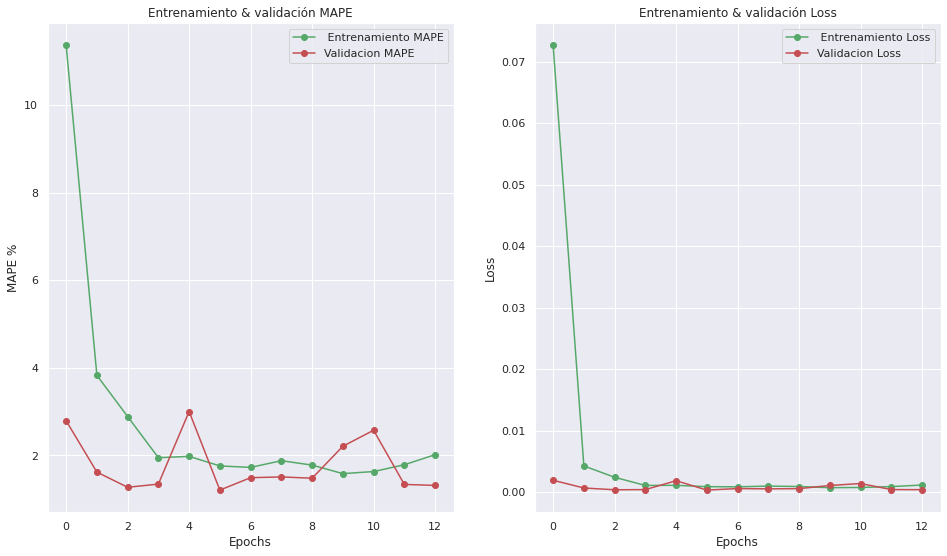

In [104]:
vis_res_MAPE(history_01, 13)

In [ ]:
X_train.shape, x_test.shape

((2623, 50, 1), (1731, 50, 1))

In [88]:
### Predict and transform 
train_predict_k = model_01.predict(X_train) 
test_predict_k = model_01.predict(x_test) 

# train_predict_k = train_predict_k[:,0,:]
# test_predict_k = test_predict_k[:,0,:]

In [ ]:
train_predict_k.shape, test_predict_k.shape

((2623, 1), (1731, 1))

In [61]:
# test_predict_k = test_predict_k.reshape(1716,50)
train_predict_k =scaler.inverse_transform(train_predict_k)
test_predict_k =scaler.inverse_transform(test_predict_k)

NameError: name 'scaler' is not defined

In [89]:
vc_trn = hndl_trn_prdct(train_predict_k)
vc_tst = hndl_tst_prdct(test_predict_k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


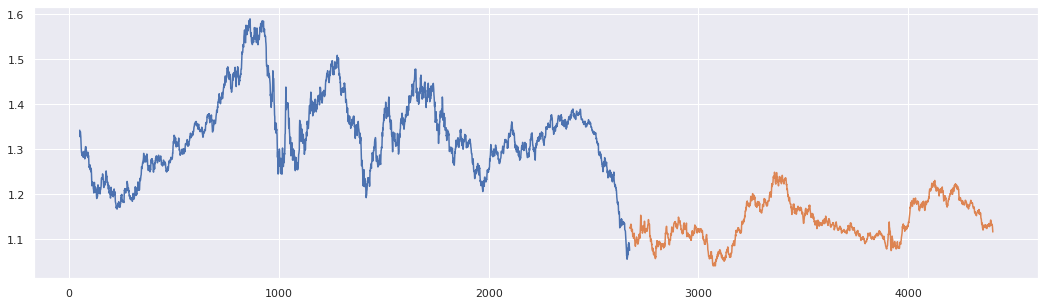

In [90]:
plt.plot(vc_trn)
plt.plot(vc_tst)

In [ ]:
type(vc_trn), type(vc_tst)

(numpy.ndarray, numpy.ndarray)

In [64]:
df0 = np.array(df['Cierre'][::-1]).reshape(-1,1)
df_f = np.concatenate((df0,vc_trn, vc_tst), axis = 1)
df_f = pd.DataFrame(df_f, columns=['Cierre','Train','Test'])

df=pd.read_csv('/content/sample_data/EURUSD.csv', sep = ',')
dataframe = df[['Date']]
Fch = np.array(dataframe['Date'][::-1])

for idx in range(0,len(Fch)):
  tmp = Fch[idx]
  Fch[idx] = datetime.strptime(tmp,"%d.%m.%Y")
 
df_f['Fecha'] = pd.DataFrame(Fch)
df_f = df_f.set_index('Fecha')


df_f

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4457 and the array at index 2 has size 4407

In [ ]:
df_f.shape

(4417, 4)

In [ ]:
df['Ultimo'].shape, len(df1)

((4417,), 4417)

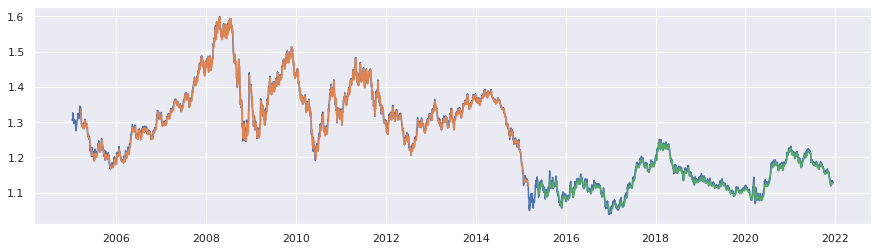

In [ ]:
plt.figure(figsize=(15,4))
# plt.plot(df_G1['Train'], label = 'Entrenamiento')
# plt.plot(df_G1['Test'], label = 'Testeo')
# plt.title('Subconjuntos de entrenamiento y testeo')
# plt.legend(title='Subconjuntos de datos')
plt.plot(df_f['Cierre'])
plt.plot(df_f['Train'])
plt.plot(df_f['Test'])
plt.show()

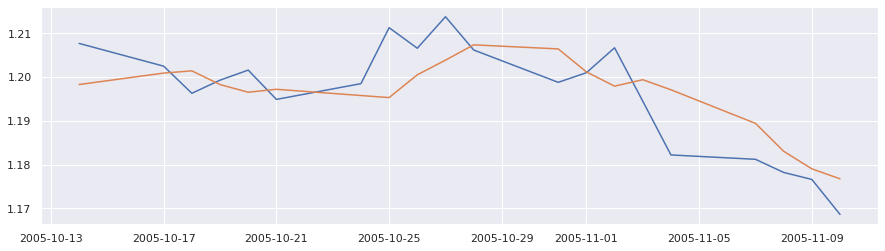

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df_f['Cierre'].iloc[200:220])
plt.plot(df_f['Train'].iloc[200:220])
#plt.plot(df_f['Test'])
plt.show()

In [ ]:
prdctn(test_data, time_step, nmb_pred=5)

Prediction: [[1.1265577]]
Prediction: [[1.1257647]]
Prediction: [[1.1246383]]
Prediction: [[1.1234697]]
Prediction: [[1.1223625]]


In [ ]:
yhat.shape, x_test.shape, test_data.shape

((50, 1), (1715, 50, 1), (1766, 1))

In [ ]:
time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_valid, y_valid = create_dataset(x_v, time_step)

X_train, Y_train = X_train.reshape(X_train.shape[0],X_train.shape[1], -1), Y_train.reshape(Y_train.shape[0],-1)
x_test, y_test = x_test.reshape(x_test.shape[0],x_test.shape[1], -1), y_test.reshape(y_test.shape[0],-1)
x_valid, y_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1],1), y_valid.reshape(y_valid.shape[0],-1)

In [ ]:
train_data.shape

(2650, 1)

In [ ]:
time_step = 50
X_train_Real= create_dataset(train_data, time_step)
type(X_train_Real)
# X_train_Real = X_train_Real.reshape(X_train_Real.shape[0],X_train_Real.shape[1], -1)


tuple